In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('train.csv')
df.head(5)

2023-03-11 10:39:54.542494: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-11 10:39:54.542547: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-11 10:40:11.201582: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-11 10:40:11.201846: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-11 10:40:11.201865: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
### Data conversion for network perception

# Replacing NaN Age with mean
# Replacing another NaN by ffill

mean_age = df[["Age"]].mean()
df = df.fillna({'Age':mean_age})
df = df.fillna(method="ffill")
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [3]:
# Replacing "Embarked" and "Sex" columns with integer  encoding

label_encoder=preprocessing.LabelEncoder()
df['gender_type']=label_encoder.fit_transform(df["Sex"])
df['embark_type']=label_encoder.fit_transform(df["Embarked"])

In [4]:
# Delete unsable features

del df['Ticket']
del df['Sex']
del df['Embarked']
del df['Cabin']
del df['Name']

In [5]:
df.head(20)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,gender_type,embark_type
0,1,0,3,22.0,1,0,7.2500,1,2
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,26.0,0,0,7.9250,0,2
3,4,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,35.0,0,0,8.0500,1,2
5,6,0,3,35.0,0,0,8.4583,1,1
6,7,0,1,54.0,0,0,51.8625,1,2
7,8,0,3,2.0,3,1,21.0750,1,2
8,9,1,3,27.0,0,2,11.1333,0,2
9,10,1,2,14.0,1,0,30.0708,0,0


In [6]:
###[0 - 1] normalization off all data

# Min and Max detection of all data

print(df.Age.agg(
    maxAge  = 'max',
    minAge  = 'min',
    ).to_markdown())

print(df.PassengerId.agg(
    maxPassengerId  = 'max',
    minPassengerId  = 'min',
    ).to_markdown())

print(df.SibSp.agg(
    maxSibSp  = 'max',
    minSibSp  = 'min',
    ).to_markdown())

print(df.Pclass.agg(
    maxPclass  = 'max',
    minPclass  = 'min',
    ).to_markdown())

print(df.Fare.agg(
    maxFare  = 'max',
    minFare  = 'min',
    ).to_markdown())

print(df.embark_type.agg(
    maxembark_type  = 'max',
    minembar_ktype  = 'min',
    ).to_markdown())

print(df.Parch.agg(
    maxParch  = 'max',
    minParch  = 'min',
    ).to_markdown())


|        |   Age |
|:-------|------:|
| maxAge | 80    |
| minAge |  0.42 |
|                |   PassengerId |
|:---------------|--------------:|
| maxPassengerId |           891 |
| minPassengerId |             1 |
|          |   SibSp |
|:---------|--------:|
| maxSibSp |       8 |
| minSibSp |       0 |
|           |   Pclass |
|:----------|---------:|
| maxPclass |        3 |
| minPclass |        1 |
|         |    Fare |
|:--------|--------:|
| maxFare | 512.329 |
| minFare |   0     |
|                |   embark_type |
|:---------------|--------------:|
| maxembark_type |             2 |
| minembar_ktype |             0 |
|          |   Parch |
|:---------|--------:|
| maxParch |       6 |
| minParch |       0 |


In [ ]:
# Convert to [0 - 1] by basic math

a = df['Parch'] / 6
b = df['embark_type'] / 2
c = df['Fare'] / 512.329

d_0 = df['Pclass'] - 1
d = d_0 / 2

e = df['SibSp'] / 8

f_0 = df['PassengerId'] - 1
f = f_0 / 890

g_0 = df['Age'] - 0.42
g = g_0 / (80 - 0.42)

# Except gender, it is binary 0/1 yet

h = df['gender_type']

# Extract Survived feature as target array

y = df['Survived']
 

In [8]:
# Merging columns into an array

x = np.column_stack((f, d, g, e, c, a, h, b))

In [179]:
# Train/test splitting

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

# Build network model

model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dropout(.75),
    layers.Dense(128, activation="relu"),
    layers.Dropout(.1),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="Adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [180]:
# Fit it!

history = model.fit(x_train,
                    y_train,
                    epochs=60,
                    batch_size=32,
                    validation_data=(x_test, y_test))

history_dict = history.history
history_dict.keys()

Epoch 1/60
23/23 [==============================] - 2s 15ms/step - loss: 0.6391 - accuracy: 0.6124 - val_loss: 0.5848 - val_accuracy: 0.6313
Epoch 2/60
23/23 [==============================] - 0s 5ms/step - loss: 0.5937 - accuracy: 0.6545 - val_loss: 0.5126 - val_accuracy: 0.7933
Epoch 3/60
23/23 [==============================] - 0s 5ms/step - loss: 0.5501 - accuracy: 0.7500 - val_loss: 0.4534 - val_accuracy: 0.8212
Epoch 4/60
23/23 [==============================] - 0s 5ms/step - loss: 0.5163 - accuracy: 0.7809 - val_loss: 0.4350 - val_accuracy: 0.8156
Epoch 5/60
23/23 [==============================] - 0s 5ms/step - loss: 0.5019 - accuracy: 0.7739 - val_loss: 0.4206 - val_accuracy: 0.8101
Epoch 6/60
23/23 [==============================] - 0s 5ms/step - loss: 0.4915 - accuracy: 0.7781 - val_loss: 0.4287 - val_accuracy: 0.8156
Epoch 7/60
23/23 [==============================] - 0s 5ms/step - loss: 0.4965 - accuracy: 0.7753 - val_loss: 0.4325 - val_accuracy: 0.8156
Epoch 8/60
23/23 [=

23/23 [==============================] - 0s 6ms/step - loss: 0.4110 - accuracy: 0.8202 - val_loss: 0.4260 - val_accuracy: 0.8156
Epoch 60/60
23/23 [==============================] - 0s 5ms/step - loss: 0.4196 - accuracy: 0.8202 - val_loss: 0.4377 - val_accuracy: 0.8212


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

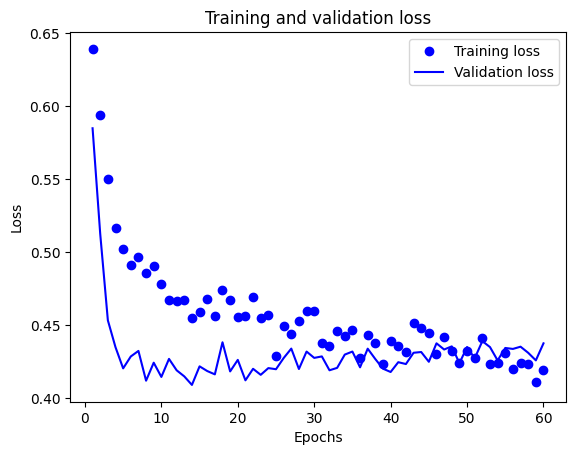

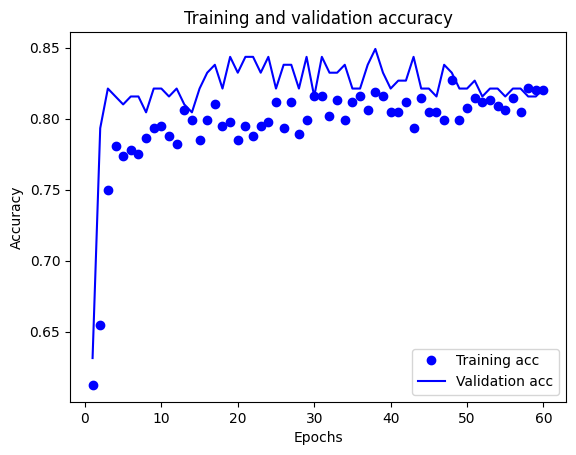

In [181]:
# Visualization of training process, epoch/loss

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Visualization of training process, epoch/accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [182]:
# Prediction and accuracy

pred = model.predict(x_test)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"test_acc: {test_acc}")

6/6 [==============================] - 0s 3ms/step - loss: 0.4377 - accuracy: 0.8212
test_acc: 0.8212290406227112


In [183]:
# Optimal metric of success

p = np.around(pred)
recall_score(y_test, p)


0.7536231884057971